# Aula 2: MDPs

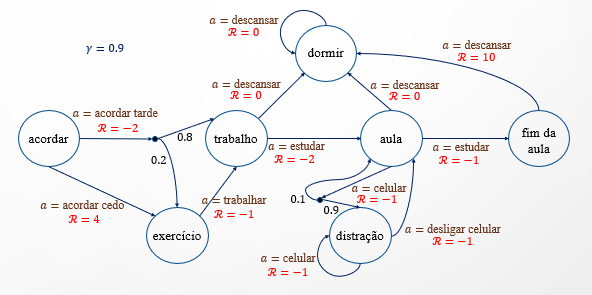

O objetivo deste código é realizar a implementação dos exemplos de MRP e MDP vistos em aula. Inicialmente vamos ver como inicializar um MRP qualquer de poucos estados e como calcular sua função valor $V(s)$. Depois vamos criar um MDP e mostrar como utilizar a classe anterior para avaliar a função valor $V_{\pi}(s)$ de um agente qualquer neste ambiente.

## Imports

In [1]:
import numpy as np

# Processo de Recompensa de Markov (MRP)

Um Processo de Recompensa de Markov é definido pelo conjunto $<S,P,R,\gamma>$, onde:
*   $S$ é um conjunto finito de estados.
*   $P$ é uma função de probabilidades de transições de estados.
*   $R$ é uma função de recompensa.
*   $\gamma$ é um fator de desconto.

Vamos implementar uma classe MRP que armazena essas variáveis e que possui um método para cálculo da Função Valor dos Estados $V(s)$.

### Classe MRP

In [2]:
# MRP
# PROPERTIES:
# StateSpace: List of States s
# TransitionMatrix: Matrix of Transition Probabilitites between states (numpy array shape=(n,n)).
# Rewards: Immediate Rewards obtained at each state (numpy array shape = (n,))
# gamma: Discount Factor gamma (float [0,1])
#
# METHODS:
# __init__: Class default constructor
# ValueFunction(self): Returns the MRP Value Function
class MRP:
    def __init__(self, StateSpace, TransitionMatrix, Rewards, gamma):
        self.StateSpace = StateSpace
        self.TransitionMatrix = TransitionMatrix
        self.Rewards = Rewards
        self.gamma = gamma
    
    def ValueFunction (self):
        n = len(self.StateSpace)
        # Bellman Equation Solution
        V = np.dot(np.linalg.inv(np.eye(n) - self.gamma*self.TransitionMatrix),\
                   self.Rewards)
        
        return dict(zip(self.StateSpace,V))

### Exemplo de Aula

Vamos criar um objeto da classe MRP que representa o Processo de Recompensa de Markov visto em aula. Este MRP apresenta 7 estados: 'acordar', 'exercício', 'trabalho', 'aula', 'distração', 'fim da aula', 'dormir'.

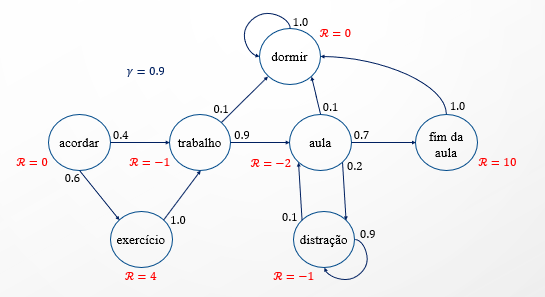

### Inicialização de Variáveis

In [3]:
# MRP State Space
StateSpace = ['acordar', 'exercicio', 'trabalho', 'aula', 'distracao',\
              'fim_da_aula', 'dormir']
# MRP State Transition Matrix
TransitionMatrix = np.array([[0, 0.6, 0.4, 0,   0,   0,   0],\
                             [0, 0,   1,   0,   0,   0,   0],\
                             [0, 0,   0,   0.9, 0,   0,   0.1],\
                             [0, 0,   0,   0,   0.2, 0.7, 0.1],\
                             [0, 0,   0,   0.1, 0.9, 0,   0],\
                             [0, 0,   0,   0,   0,   0,   1],\
                             [0, 0,   0,   0,   0,   0,   1]])
# MRP Rward Function
Rewards = np.array([0, 4, -1, -2, -1, 10, 0])

In [4]:
print('State Space = ' + str(StateSpace) + '\n')

print('TransitionMatrix = ')
print(str(TransitionMatrix)  + '\n')

print('Rewards = ' + str(Rewards)  + '\n')

State Space = ['acordar', 'exercicio', 'trabalho', 'aula', 'distracao', 'fim_da_aula', 'dormir']

TransitionMatrix = 
[[0.  0.6 0.4 0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.9 0.  0.  0.1]
 [0.  0.  0.  0.  0.2 0.7 0.1]
 [0.  0.  0.  0.1 0.9 0.  0. ]
 [0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  1. ]]

Rewards = [ 0  4 -1 -2 -1 10  0]



### Criação de MRP

In [5]:
# Create MRP
mrp = MRP(StateSpace, TransitionMatrix, Rewards, gamma=0.9)

### Função Valor dos Estados

In [6]:
# Value Function
V = mrp.ValueFunction()
print('MRP')
print('-----------------')
print('Value Function')
print(V)

MRP
-----------------
Value Function
{'acordar': 3.825568584579977, 'exercicio': 5.771881472957421, 'trabalho': 1.9687571921749134, 'aula': 3.6651323360184116, 'distracao': -3.52704257767549, 'fim_da_aula': 10.0, 'dormir': 0.0}


# Processo de Decisão de Markov (MDP)

Um Processo de Recompensa de Markov é definido pelo conjunto $<S,A,P,R,\gamma>$, onde:
*   $S$ é um conjunto finito de estados.
*   $A$ é um conjunto finito de ações.
*   $P$ é uma função de probabilidades de transições de estados.
*   $R$ é uma função de recompensa.
*   $\gamma$ é um fator de desconto.

Vamos implementar uma classe MDP que armazena essas variáveis e que possui um método para cálculo da Função Valor dos Estados $V_{\pi}(s)$ associada a uma política $\pi(a|s)$.

### Classe MDP

In [7]:
# MDP
# PROPERTIES:
# StateSpace: List of States s 
# ActionSpace: List of Actions a
# TransitionMatrices: List of Matrices of Transition Probabilitites between states (one for each action)
# Rewards: Immediate Rewards obtained at each state-action pair (numpy array shape = (n,m))
# gamma: Discount Factor gamma (float [0,1])
#
# METHODS:
# __init__: Class default constructor
# ValueFunction(self, policy): Returns the MDP Value Function
class MDP:
    def __init__(self, StateSpace, ActionSpace, TransitionMatrices, Rewards, gamma):
        self.StateSpace = StateSpace
        self.ActionSpace = ActionSpace
        self.TransitionMatrices = TransitionMatrices
        self.Rewards = Rewards
        self.gamma = gamma
    
    def ValueFunction(self, policy):
        n = len(self.StateSpace)
        m = len(self.ActionSpace)
        P_MRP = np.zeros((n,n))
        R_MRP = np.zeros(n)
        
        # Build MRP Transition Matrix
        for s in range(0,n):
            for s_next in range(0,n):
                mrp_transition_prob = 0
                for action_index in range(0,m):
                    if (policy[s][action_index] is not None):
                        t = self.TransitionMatrices[action_index]
                        mrp_transition_prob += policy[s,action_index]*t[s][s_next]

                P_MRP[s][s_next] = mrp_transition_prob
        
        # Build MRP Reward Function
        for s in range(0,n):
            mrp_reward = 0
            for action_index in range(0,m):
                if (policy[s][action_index] is not None):
                    r = self.Rewards[s][action_index]
                    mrp_reward += policy[s,action_index]*r
                                 
            R_MRP[s] = mrp_reward
            
        # Build MRP
        mrp = MRP(StateSpace, P_MRP, R_MRP, self.gamma)
        
        # Value Function
        return mrp.ValueFunction()

### Exemplo de Aula

Vamos criar um objeto da classe MDP que representa o Processo de Decisão de Markov visto em aula. Este MDP apresenta 7 estados: 'acordar', 'exercício', 'trabalho', 'aula', 'distração', 'fim da aula', 'dormir'

e 7 ações: 'acordar cedo', 'acordar tarde', 'trabalhar', 'estudar', 'celular', 'desligar celular', 'descansar'.

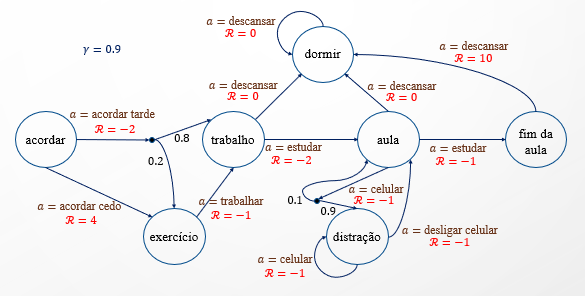

### Inicialização de Variáveis

Vamos inicializar os espaços de estados e ações, as probabilidades de transições de estados e as recompensas deste MDP.

As matrizes de probabilidades de transições e a matriz de recompensas são inicializadas com 'None' para ações que não estão disponíveis em determinado estado.

In [8]:
# MDP State Space
StateSpace = ['acordar', 'exercicio', 'trabalho', 'aula', 'distracao',\
              'fim_da_aula', 'dormir']
# MDP Action Space
ActionSpace = ['acordar_cedo', 'acordar_tarde', 'trabalhar', 'estudar',\
               'celular', 'desligar_celular', 'descansar']

# MDP Transition Probabilities

# a1 = acordar_cedo
P_a1 = np.array([[   0,    1,    0,    0,    0,    0,    0],\
                 [None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None]])
# a2 = acordar_tarde
P_a2 = np.array([[   0,  0.2,  0.8,    0,    0,    0,    0],\
                 [None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None]])
# a3 = trabalhar
P_a3 = np.array([[None, None, None, None, None, None, None],\
                 [   0,    0,    1,    0,    0,    0,    0],\
                 [None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None]])
# a4 = estudar
P_a4 = np.array([[None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None],\
                 [   0,    0,    0,    1,    0,    0,    0],\
                 [   0,    0,    0,    0,    0,    1,    0],\
                 [None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None]])
# a5 = celular
P_a5 = np.array([[None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None],\
                 [   0,    0,    0,  0.1,  0.9,    0,    0],\
                 [   0,    0,    0,    0,    1,    0,    0],\
                 [None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None]])
# a6 = desligar_celular
P_a6 = np.array([[None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None],\
                 [   0,    0,    0,    1,    0,    0,    0],\
                 [None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None]])
# a7 = descansar
P_a7 = np.array([[None, None, None, None, None, None, None],\
                 [None, None, None, None, None, None, None],\
                 [   0,    0,    0,    0,    0,    0,    1],\
                 [   0,    0,    0,    0,    0,    0,    1],\
                 [None, None, None, None, None, None, None],\
                 [   0,    0,    0,    0,    0,    0,    1],\
                 [   0,    0,    0,    0,    0,    0,    1]])

TransitionMatrices = [P_a1, P_a2, P_a3, P_a4, P_a5, P_a6, P_a7]

Rewards = np.array([[   4,   -2, None, None, None, None, None],\
                    [None, None,   -1, None, None, None, None],\
                    [None, None, None,   -2, None, None,    0],\
                    [None, None, None,   -1,   -1, None,    0],\
                    [None, None, None, None,   -1,   -1, None],\
                    [None, None, None, None, None, None,   10],\
                    [None, None, None, None, None, None,    0]])

### Criação de MDP

In [9]:
# Create MDP
mdp = MDP(StateSpace, ActionSpace, TransitionMatrices, Rewards, gamma=0.9)

### Inicialização de Políticas

Vamos criar duas políticas (aleatória e ótima) e estudar a Função Valor dos Estados $V_{\pi}(s)$ associada a cada uma.

Na aula seguinte veremos como resolver um MDP por métodos de Programação Dinâmica para obter a política ótima $\pi^*$

In [10]:
# Random Policy
Pi_random = np.array([[0.5,  0.5, None, None, None, None, None],\
                      [None, None,    1, None, None, None, None],\
                      [None, None, None,  0.5, None, None,  0.5],\
                      [None, None, None,  1/3,  1/3, None,  1/3],\
                      [None, None, None, None,  0.5,  0.5, None],\
                      [None, None, None, None, None, None,    1],\
                      [None, None, None, None, None, None,    1]])

In [11]:
# Optimal Policy
Pi_optimal = np.array([[   1, None, None, None, None, None, None],\
                       [None, None,    1, None, None, None, None],\
                       [None, None, None,    1, None, None, None],\
                       [None, None, None,    1, None, None, None],\
                       [None, None, None, None, None,    1, None],\
                       [None, None, None, None, None, None,    1],\
                       [None, None, None, None, None, None,    1]])

### Função Valor dos Estados

In [12]:
print('')
print('MDP')
print('-----------------')
print('Value Function for Random Agent')
V_rand = mdp.ValueFunction(policy=Pi_random)
print(V_rand)


MDP
-----------------
Value Function for Random Agent
{'acordar': 0.5503495145631072, 'exercicio': -0.9038834951456312, 'trabalho': 0.10679611650485432, 'aula': 2.4595469255663436, 'distracao': 0.19417475728155353, 'fim_da_aula': 10.0, 'dormir': 0.0}


In [13]:
print('-----------------')
print('Value Function for Optimal Agent')
V_opt = mdp.ValueFunction(policy=Pi_optimal)
print(V_opt)

-----------------
Value Function for Optimal Agent
{'acordar': 7.312000000000001, 'exercicio': 3.6800000000000006, 'trabalho': 5.200000000000001, 'aula': 8.0, 'distracao': 6.200000000000001, 'fim_da_aula': 10.0, 'dormir': 0.0}
